## Plotting the Charts (index.html)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os
import warnings
warnings.simplefilter('ignore')

In [57]:
file = os.path.join('cases', 'all.ipynb')
%run '{file}'

### Chart 1: All Cases

In [42]:
def linechart_one(country):

    # x-axis
    dates = confirmed_df.columns.tolist()
    days = range(len(dates))

    # y-axis
    confirmed = confirmed_df.loc[confirmed_df.index == country].values[0]
    recovered = recovered_df.loc[recovered_df.index == country].values[0]
    fatalities = fatalities_df.loc[fatalities_df.index == country].values[0]
    
    # Figure
    fig, ax = plt.subplots(figsize = (9,6))
    
    # Axes
    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(1, len(dates)-1)
    plt.ylim(0, confirmed.max()+5000)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
    ax.tick_params(axis='both', labelsize=14)
    ax.set_axisbelow(True)
    plt.grid(axis='y', alpha=0.3)

    # Line plots
    ax.plot(days, confirmed, label='Confirmed', color='tomato', linestyle='-')
    ax.fill_between(days, recovered+fatalities, confirmed, color='tomato', alpha=0.7)
    
    ax.plot(days, recovered+fatalities, label='Recovered', color='teal', linestyle='-')
    ax.fill_between(days, fatalities, recovered+fatalities, color='teal', alpha=0.7)
    
    ax.plot(days, fatalities, label='Fatalities', linestyle='-')
    ax.fill_between(days, 0, fatalities, alpha=0.9)

    # Save image
    plt.tight_layout()
    country = country.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'chart1_{country}.png')
    plt.savefig(saved_img, bbox_inches='tight')
    plt.show()

#### Global

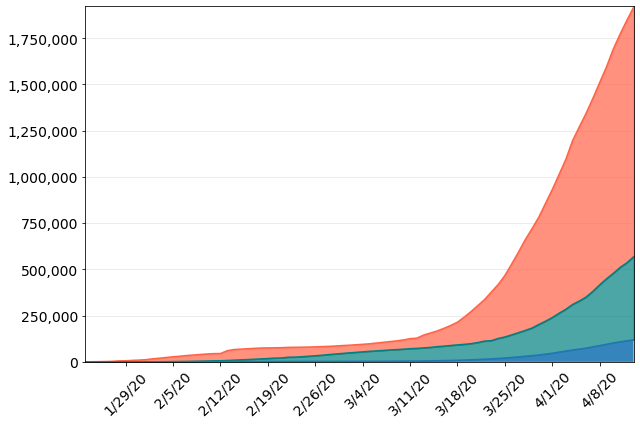

In [43]:
linechart_one('Global')

#### By Country

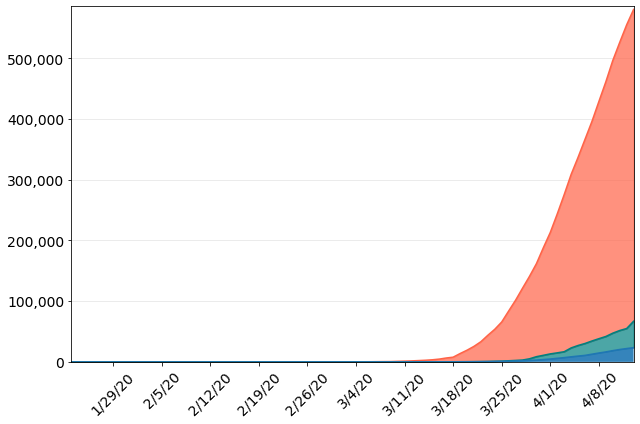

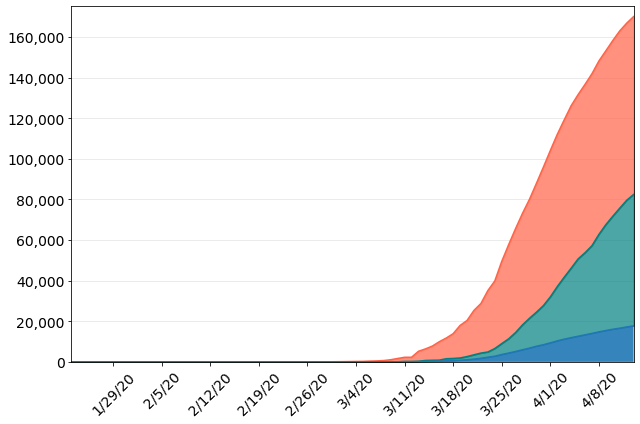

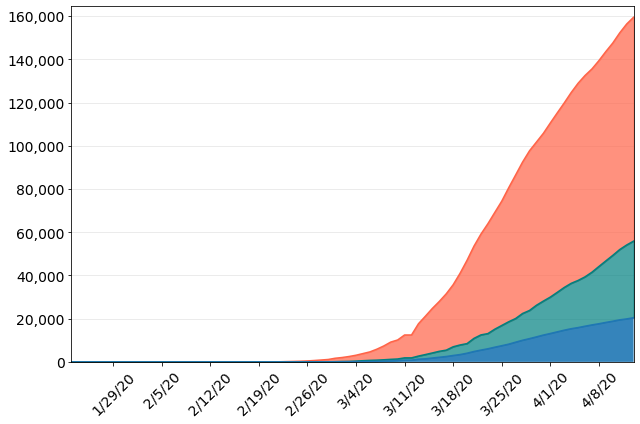

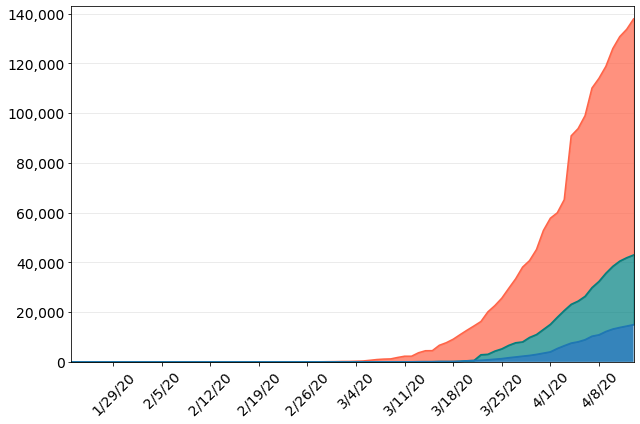

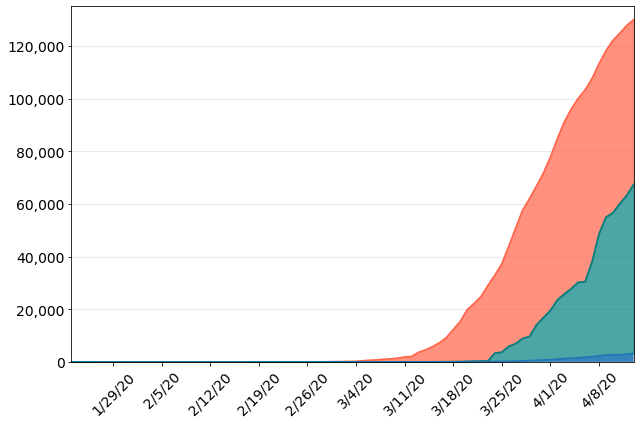

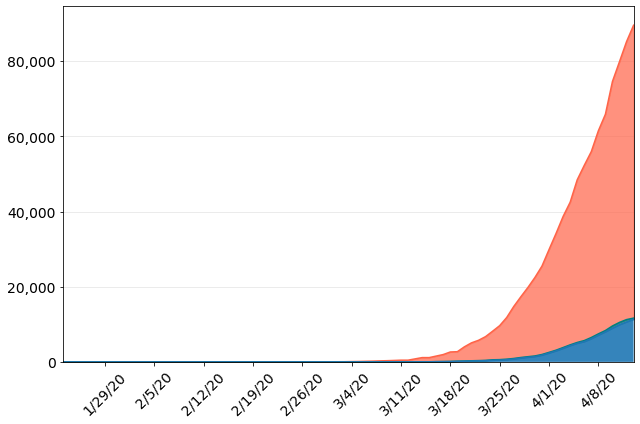

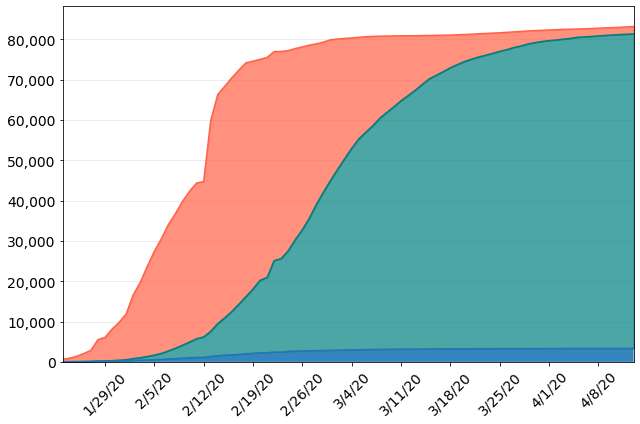

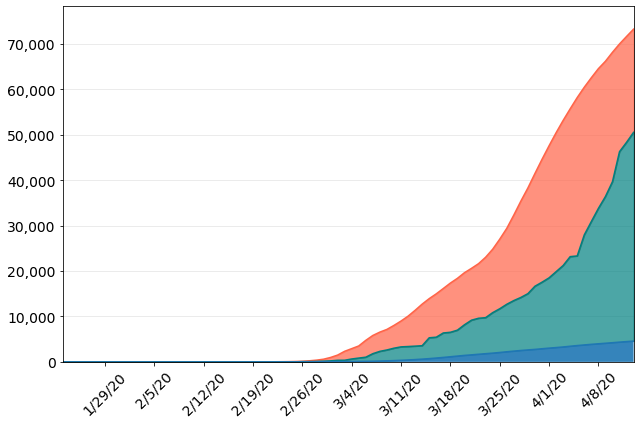

In [44]:
for i in range(len(top_confirmed_df)):
    country = top_confirmed_df.index[i]
    linechart_one(country)

### Chart 2: Infected (Global)

In [45]:
color_index = ['grey','crimson','purple','navy','teal','green','coral','goldenrod']

In [51]:
def linechart_global(df, output_file):

    # x-axis
    dates = df.columns.tolist()
    days = range(len(dates))

    # y-axis
    countries = df.index
    y = df.values.tolist()

    # Figure
    fig, ax = plt.subplots(figsize = (9,6))
    plt.title('Infected (C - R - F)', fontsize=14)
    
    # Axes
    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(1, len(dates)-1)
    plt.yticks(np.arange(0, 550000, step=50000))
    plt.ylim(0, 550000)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
    ax.tick_params(axis='both', labelsize=14)
    ax.set_axisbelow(True)
    plt.grid(axis='y', alpha=0.3)

    # Line plots
    counter = 0
    country_labels = ()
    for country in countries:
        
        ax.plot(days, y[counter], label=countries, color=color_index[counter], linewidth=2, linestyle='-')

        country_labels += (country,)
        counter += 1
        if counter == len(countries):
            break
    
    # Save Image
    plt.legend(country_labels, loc='best')            
    plt.tight_layout()
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

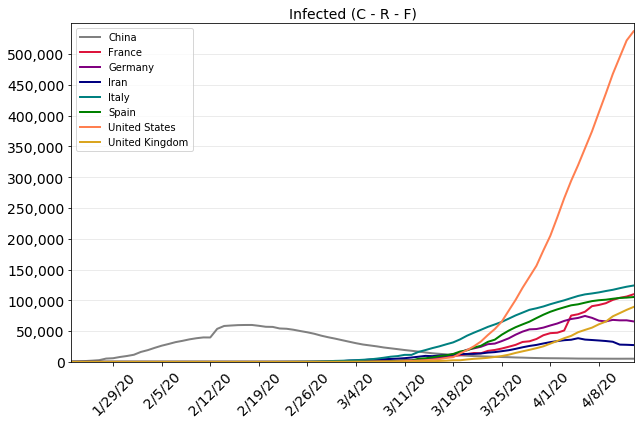

In [52]:
saved_img = os.path.join('..', 'images','chart2_global.png')

# linechart_global(first_infected_top, saved_img)
linechart_global(top_infected_df, saved_img)

### Chart 2: New Cases (by Country)

In [48]:
newcases_df = pd.DataFrame(columns=top_confirmed_df.columns, data=[])
countries = top_confirmed_df.index

for country in countries:
    newcases = top_confirmed_df.loc[top_confirmed_df.index==country].values[0]

    row=[]
    for i in range(len(newcases)):
        if (i==0):
            row.append(newcases[0])
        else:
            row.append(newcases[i]-newcases[i-1])

    row = pd.Series(row, index=top_confirmed_df.columns, name=country)
    newcases_df = newcases_df.append(row)

newcases_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
United States,1,0,1,0,3,0,0,0,0,2,...,33267,28219,29595,29556,32829,32385,35098,29861,28917,25306
Spain,0,0,0,0,0,0,0,0,0,0,...,6969,5478,5029,5267,6278,5002,5051,4754,3804,3268
Italy,0,0,0,0,0,0,0,0,0,2,...,4805,4316,3599,3039,3836,4204,3951,4694,4092,3153
France,0,0,2,1,0,0,1,1,0,0,...,25646,2925,5190,11102,3894,4822,7150,4796,2943,4205
Germany,0,0,0,0,0,1,3,0,0,1,...,4933,4031,3251,4289,5633,4885,3990,2737,2946,2218
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,3788,5959,3843,3670,5525,4398,8733,5269,5332,4364
China,548,95,277,486,669,802,2632,578,2054,1661,...,32,59,63,53,91,74,58,73,120,79
Iran,0,0,0,0,0,0,0,0,0,0,...,2560,2483,2274,2089,1997,1634,1972,1837,1657,1617


In [49]:
def linechart_newcases(df, country):
    
    # x-axis
    dates = confirmed_df.columns.tolist()
    days = range(len(dates))

    # y-axis
    c_values = df.loc[country,:]

    # Figure
    fig, ax = plt.subplots(figsize = (9,6))
    plt.title(f'Number of New Cases', fontsize=14)

    # Axes
    xticks = [day*7 for day in days]
    xlabels = dates[0::7]
    plt.xticks(xticks, xlabels, rotation=45)
    plt.xlim(1, len(dates)-1)
    plt.ylim(0, c_values.max()*1.03)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ',')))
    ax.tick_params(axis='both', labelsize=14)
    ax.set_axisbelow(True)
    plt.grid(axis='y', alpha=0.3)
    
    # Line plot
    c_rolling = c_values.rolling(window=7).mean()
    plt.plot(dates, c_values, color='coral', linestyle='--', linewidth=2, alpha=0.5, label='Since Previous Day')
    plt.plot(dates, c_rolling, color='coral', linestyle='-', linewidth=2, alpha=1, label='Weekly Average')
    print("Peak: " + np.argmax(c_rolling))
    
    # Save image
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    country = country.replace(' ', '').lower()
    saved_img = os.path.join('..', 'images',f'chart2_{country}.png')
    plt.savefig(saved_img, bbox_inches='tight')
    plt.show()

Peak: 4/10/20


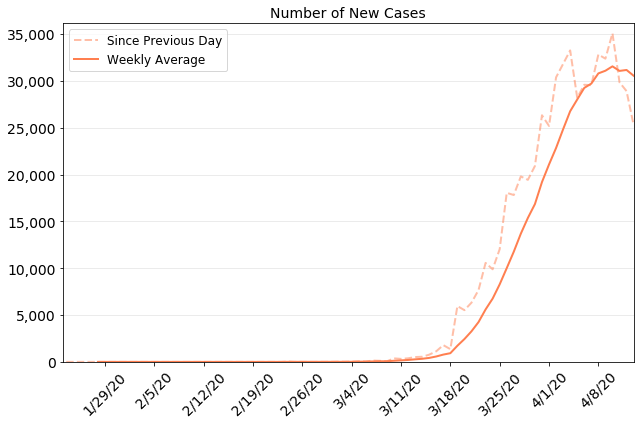

Peak: 3/31/20


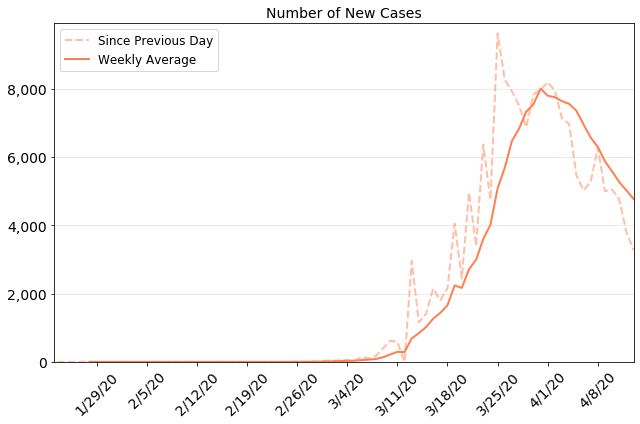

Peak: 3/26/20


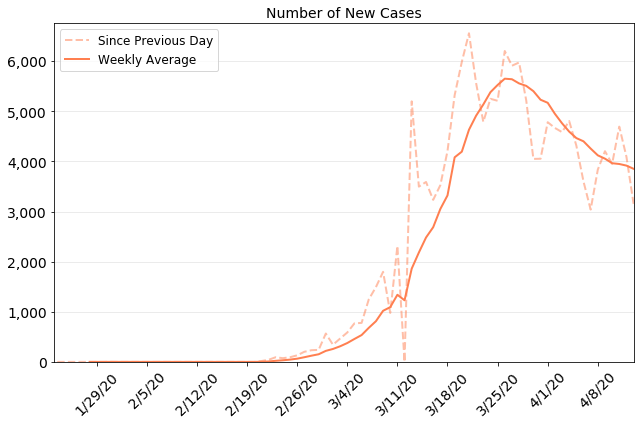

Peak: 4/10/20


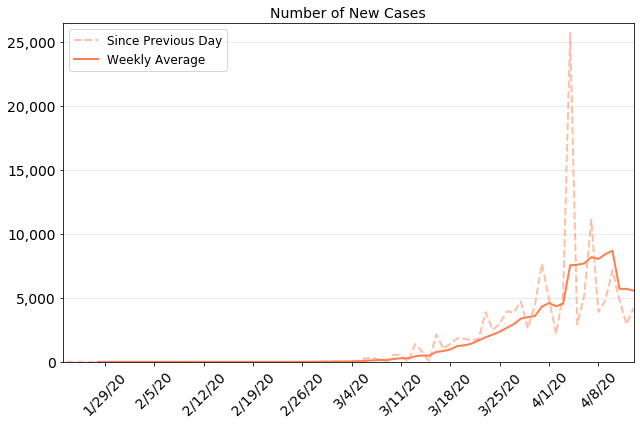

Peak: 4/2/20


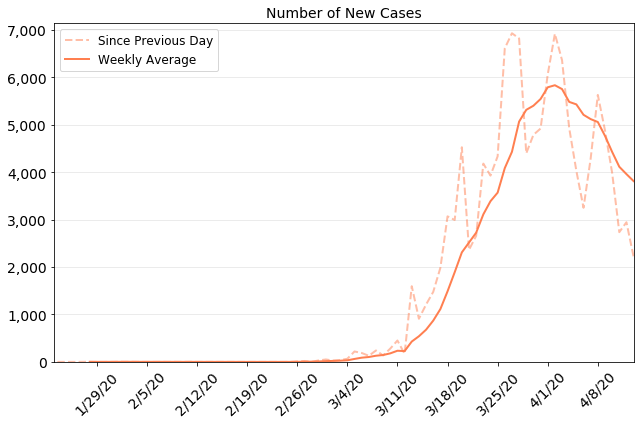

Peak: 4/11/20


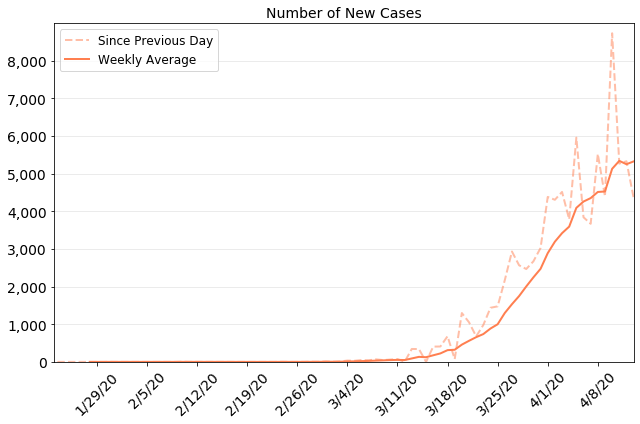

Peak: 2/14/20


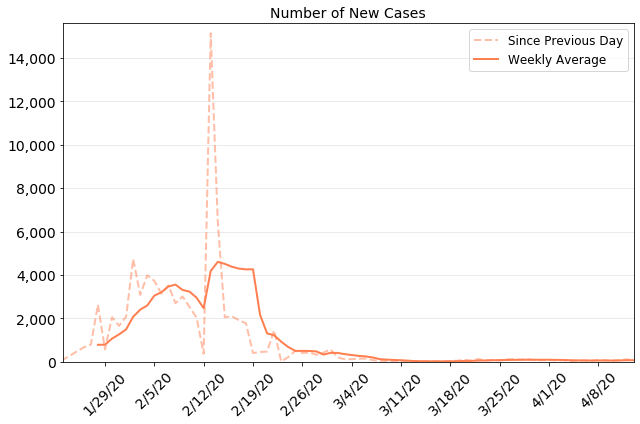

Peak: 4/2/20


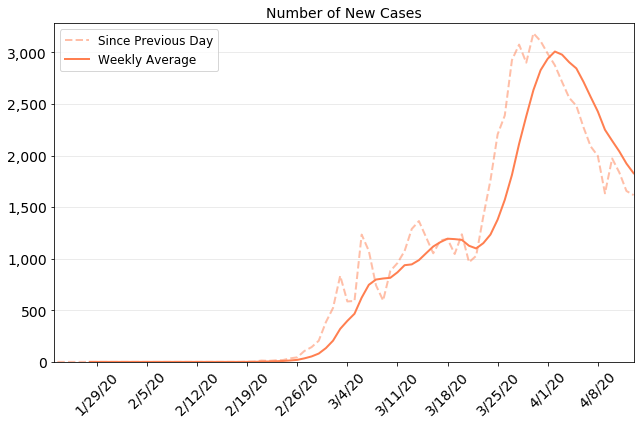

In [50]:
for i in range(len(top_confirmed_df)):
    country = top_confirmed_df.index[i]
    linechart_newcases(newcases_df, country)